아래의 실습에 대한 참고입니다.

http://pythondata.com/forecasting-time-series-data-with-prophet-part-1/

# 1. Getting Started

In [2]:
from fbprophet import Prophet
import numpy as np
import pandas as pd

In [3]:
sales_df = pd.read_csv('../prophet quickstart/examples/example_retail_sales.csv')

In [4]:
sales_df.head()

,ds,y
0,1992-01-01,146376
1,1992-02-01,147079
2,1992-03-01,159336
3,1992-04-01,163669
4,1992-05-01,170068


### Log Transform

In [5]:
sales_df['y_orig'] = sales_df['y'] # to save a copy of the original data..you'll see why shortly. 
sales_df['y'] = np.log(sales_df['y'])

In [6]:
sales_df.head()

,ds,y,y_orig
0,1992-01-01,11.893934,146376
1,1992-02-01,11.898725,147079
2,1992-03-01,11.978770,159336
3,1992-04-01,12.005601,163669
4,1992-05-01,12.043954,170068


In [7]:
model = Prophet() #instantiate Prophet
model.fit(sales_df); #fit the model with your dataframe

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/sailyourlife/anaconda3/envs/nextopt/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


### Montly Frequency로 생성 - Month 데이터는 이 기준으로 할 수 있다. (중장기)

In [8]:
future_data = model.make_future_dataframe(periods=6, freq = 'm')

In [9]:
forecast_data = model.predict(future_data)

In [10]:
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
294,2016-06-30,13.057660,13.036341,13.076664
295,2016-07-31,13.082328,13.061414,13.102189
296,2016-08-31,13.015536,12.995250,13.036772
297,2016-09-30,13.037846,13.018407,13.059443
298,2016-10-31,13.055697,13.033713,13.078010


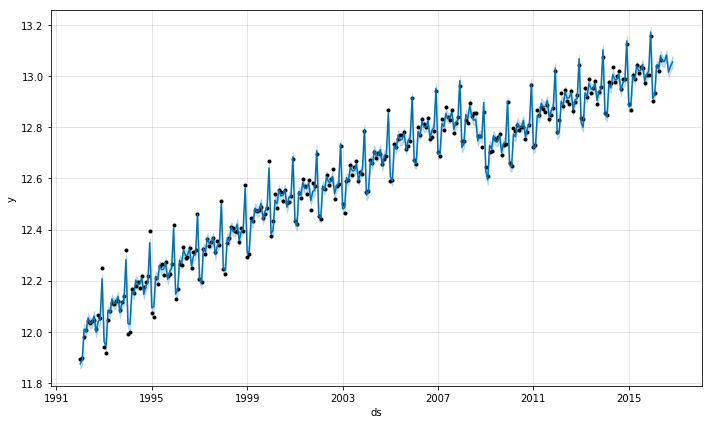

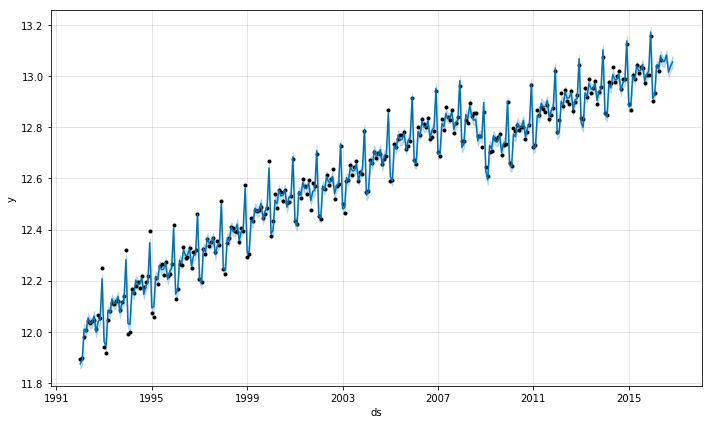

In [11]:
model.plot(forecast_data)

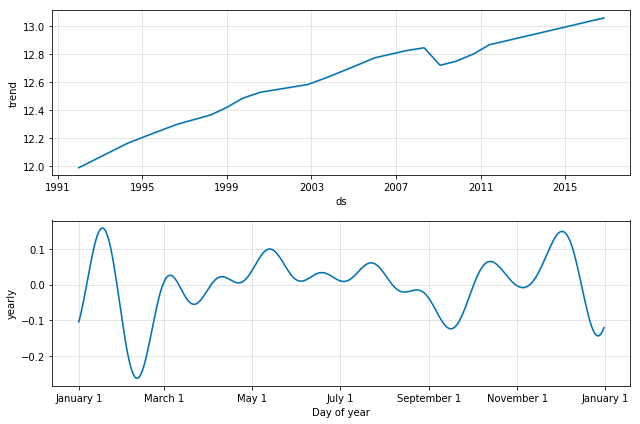

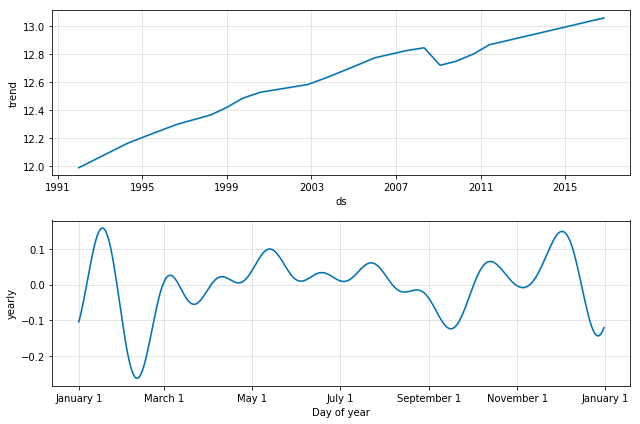

In [12]:
model.plot_components(forecast_data)

### Original Data로 변형

In [13]:
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

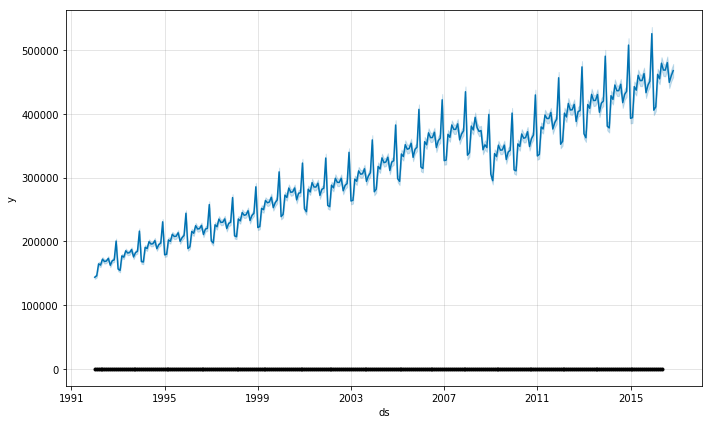

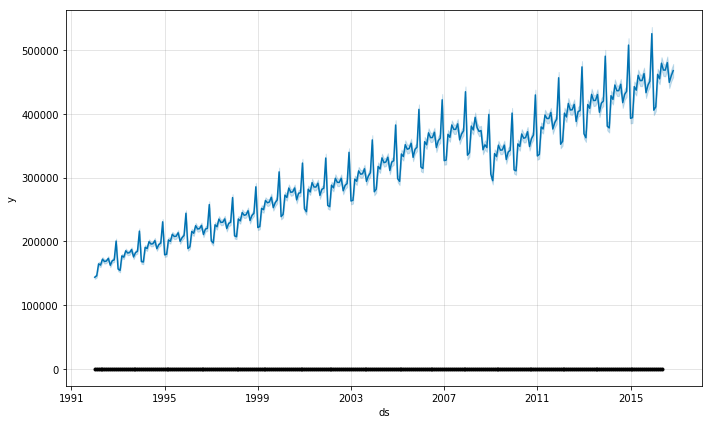

In [14]:
model.plot(forecast_data_orig)

In [15]:
#sales_df['y_log']=sales_df['y'] #copy the log-transformed data to another column
#sales_df['y']=sales_df['y_orig'] #copy the original data to 'y'

In [19]:
a = np.exp(np.log([1,2,3]))

In [20]:
a

array([1., 2., 3.])